In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("data.csv")

# Display the first five rows of the dataset
data.head(5)

,Std,ID,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,Desc,HV
0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860,NaN,NaN,NaN
1,ANSI,05982AC66F064F9EBC709E7A4164613A,Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.3,7860,NaN,NaN,NaN
2,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.3,7860,NaN,NaN,NaN
3,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860,NaN,NaN,NaN
4,ANSI,DCE10036FC1946FC8C9108D598D116AD,Steel SAE 1020,normalized,441,346,35.8,131.0,207000,79000,0.3,7860,550.0,NaN,NaN


In [3]:
# Check for missing values
data.isnull().sum()

Std                  0
ID                   0
Material             0
Heat treatment     750
Su                   0
Sy                   0
A5                 206
Bhn               1089
E                    0
G                    0
mu                   0
Ro                   0
pH                1359
Desc               571
HV                1387
dtype: int64

In [4]:
# Handle missing values for categorical columns Heat treatment and Description
data['Heat treatment'].fillna('Unknown', inplace=True)
data['Desc'].fillna('N/A', inplace=True)

# Handle missing values for numerical columns A5, Bhn, pH, and HV
data['A5'].fillna(data['A5'].median(), inplace=True)
data['Bhn'].fillna(data['Bhn'].median(), inplace=True)
data['pH'].fillna(data['pH'].median(), inplace=True)
data['HV'].fillna(data['HV'].median(), inplace=True)

In [5]:
# Check for missing values
data.isnull().sum()

Std               0
ID                0
Material          0
Heat treatment    0
Su                0
Sy                0
A5                0
Bhn               0
E                 0
G                 0
mu                0
Ro                0
pH                0
Desc              0
HV                0
dtype: int64

In [6]:
# Remove any string values from Sy column
data['Sy'] = data['Sy'].str.replace(' max', '').astype(int)

In [7]:
# Drop the unnecessary columns
data.drop(['Std','ID', 'Heat treatment', 'A5', 'Bhn','Desc','pH','Desc','HV'], axis=1, inplace=True)
data.head(4)

,Material,Su,Sy,E,G,mu,Ro
0,Steel SAE 1015,421,314,207000,79000,0.3,7860
1,Steel SAE 1015,424,324,207000,79000,0.3,7860
2,Steel SAE 1015,386,284,207000,79000,0.3,7860
3,Steel SAE 1020,448,331,207000,79000,0.3,7860


In [8]:
# Adding a new feature: Factor of Safety (FOS)
data['FOS'] = (data['Su'] / data['Sy']).round(3)

In [9]:
# Basic statistics
data.describe()

,Su,Sy,E,G,mu,Ro,FOS
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,572.753222,387.010309,164571.520619,85598.840206,0.302977,6929.843428,1.661852
std,326.834927,289.482497,56135.405867,125326.800138,0.024590,2115.171710,0.516312
min,69.000000,28.000000,73000.000000,26000.000000,0.200000,1750.000000,0.919000
25%,340.000000,205.000000,105000.000000,40000.000000,0.300000,7160.000000,1.294000
50%,500.000000,305.000000,206000.000000,79000.000000,0.300000,7860.000000,1.558000
75%,705.000000,470.000000,206000.000000,80000.000000,0.320000,7860.000000,1.873000
max,2220.000000,2048.000000,219000.000000,769000.000000,0.350000,8930.000000,5.021000


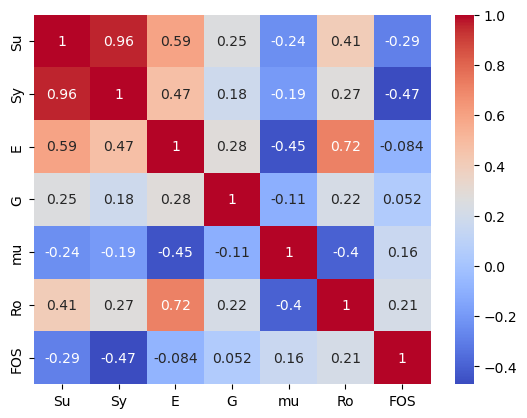

In [10]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

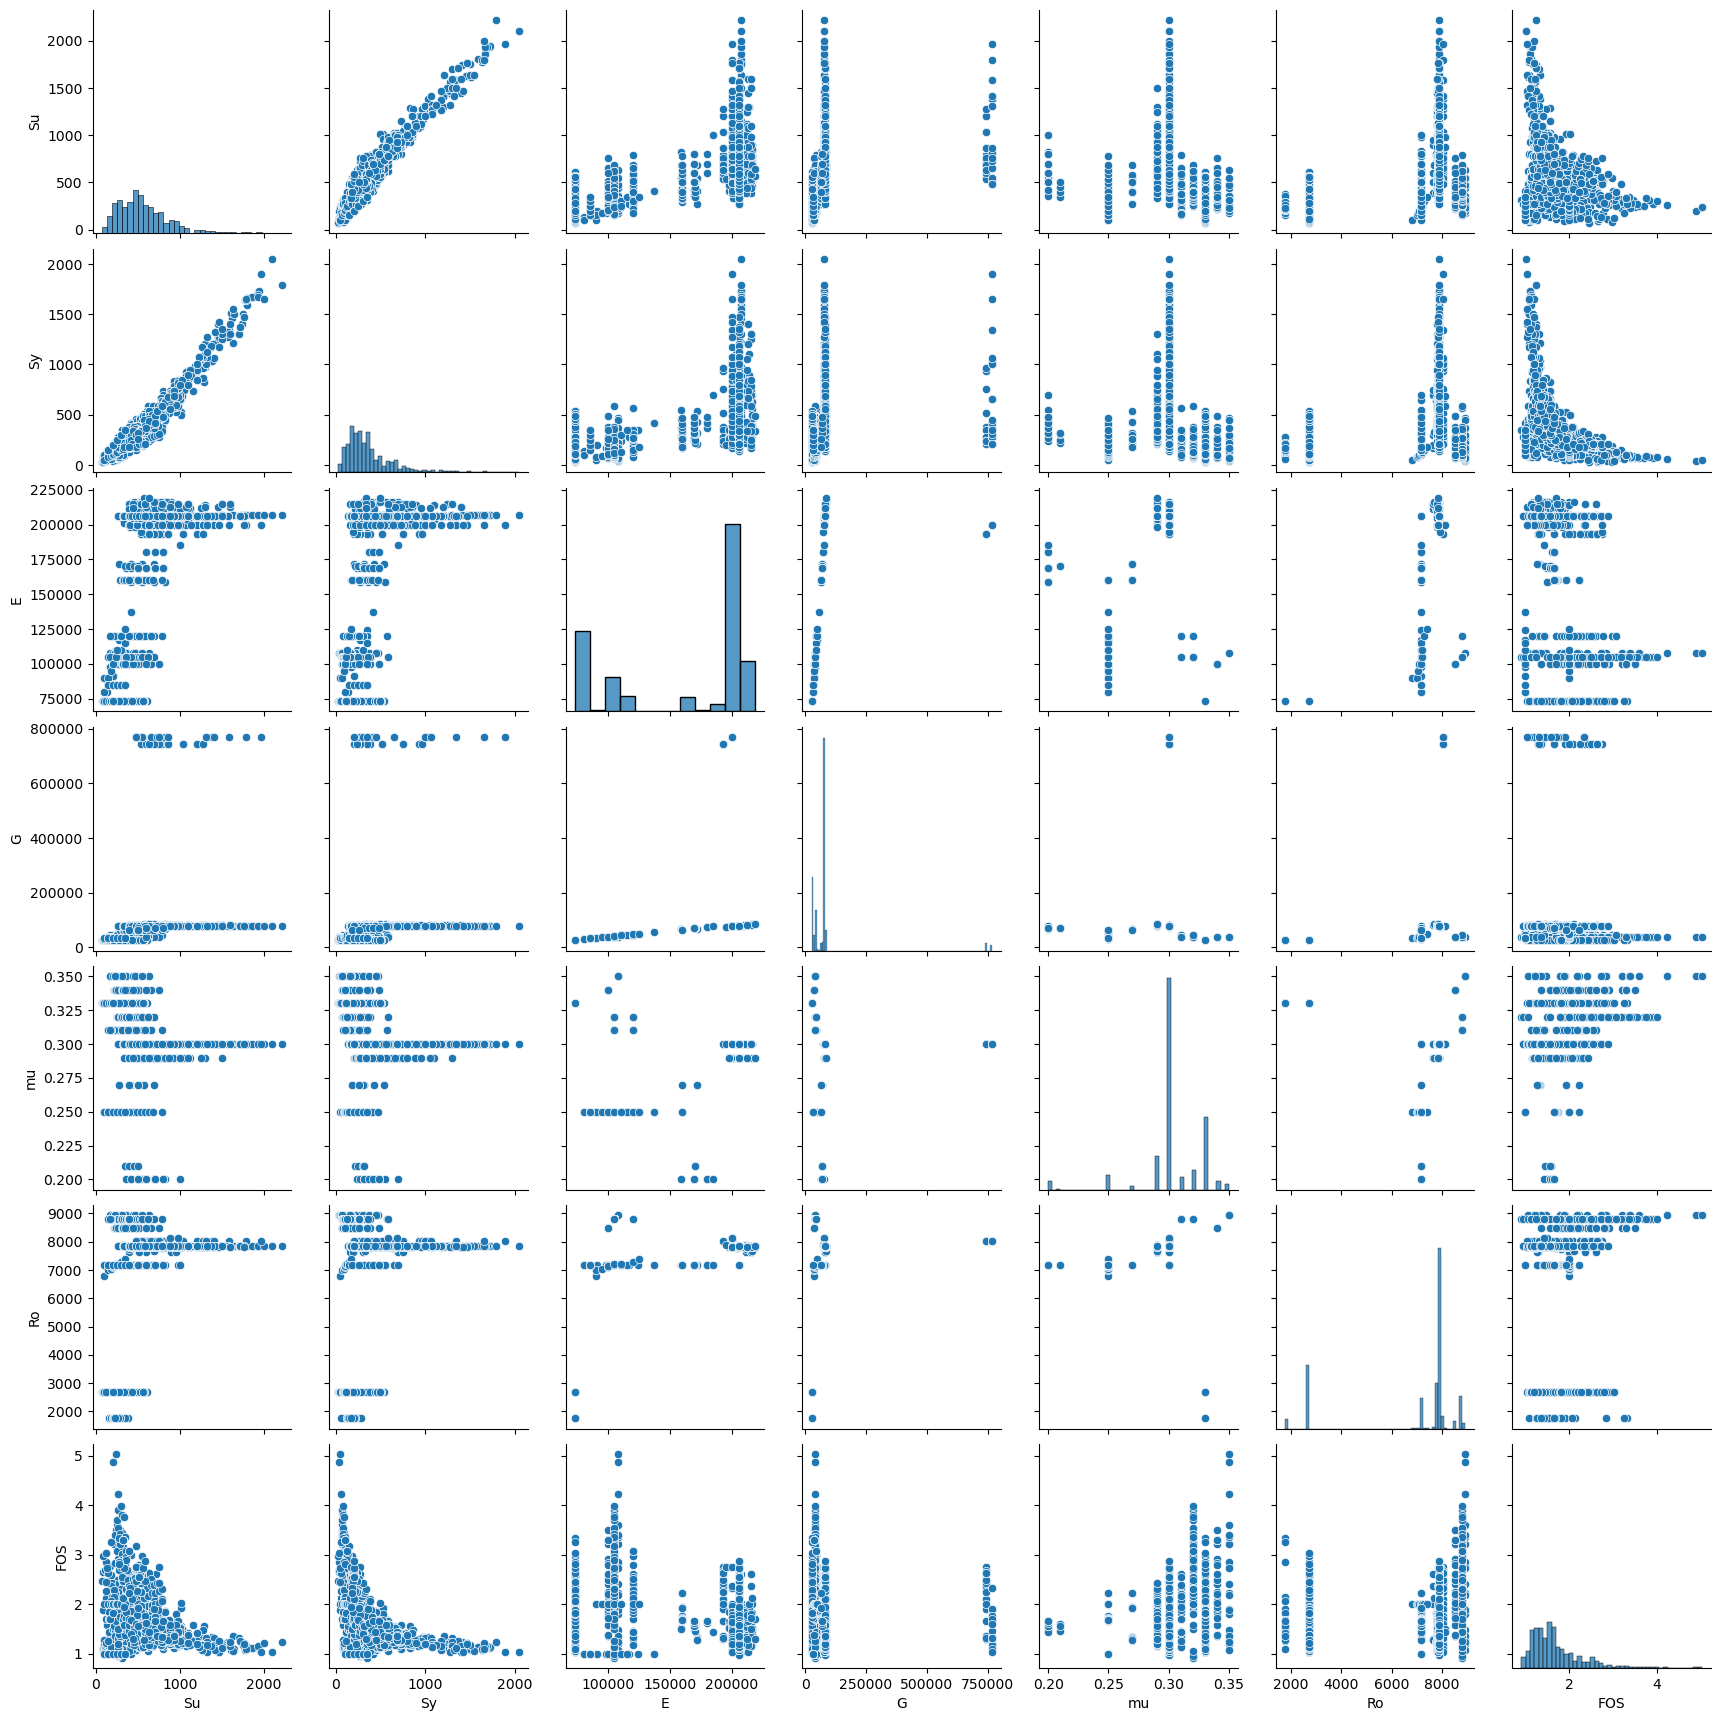

In [11]:
# Pairplot
sns.pairplot(data)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
# Separate features and target
X = data.drop(columns=['Material','FOS'])  # Exclude the target column
y = data['FOS']

In [14]:
# Label encode categorical columns
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = label_encoder.fit_transform(X[col])

In [15]:
# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [16]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
# Print the evaluation metrics
print("Model: Random Forest")
print(f"RMSE: {(rmse).round(2)}")
print(f"MAE: {(mae).round(2)}")
print(f"R^2 Score: {(r2*100).round(2)}%")

Model: Random Forest
RMSE: 0.1
MAE: 0.04
R^2 Score: 95.98%


In [21]:
print("Predicted values:")
print(y_pred)

Predicted values:
[1.22466 1.2132  1.63185 1.53415 1.53021 1.85155 1.92039 1.38    1.4077
 1.00249 1.51338 1.50092 1.89199 1.32864 1.84685 1.9251  1.30394 1.62116
 3.77212 1.33325 1.55898 1.22535 1.15934 1.80816 1.11332 1.71104 1.25797
 2.40843 1.35032 1.53928 1.52611 1.667   1.15934 1.15869 2.48988 1.36752
 1.68444 1.62245 1.07878 2.51044 1.45301 1.7475  1.29749 1.3164  1.21341
 1.55735 2.04125 1.31033 1.562   2.2631  2.50542 1.99188 3.60452 1.22466
 1.88228 2.04818 0.99177 1.78094 1.42    1.68482 1.38869 1.70304 1.23285
 1.69551 1.24373 1.35266 1.30023 1.32613 3.47659 1.69227 2.21757 1.35378
 2.39213 1.58979 2.19442 1.47962 2.08796 2.24015 1.62245 1.63283 1.32819
 3.28351 1.09293 2.57885 1.50769 1.57873 1.31802 1.17845 1.45625 1.30475
 1.86839 2.37274 1.24817 1.74025 1.30403 1.27091 1.53643 1.32167 2.57069
 1.57634 2.48994 1.44902 1.00249 2.17698 1.15074 1.      1.15549 1.7111
 2.43973 1.00253 1.37598 1.1935  1.7769  1.23604 1.65876 1.44224 2.33935
 2.01843 1.35378 1.54048 1.41088 1.

In [22]:
data.head(5)

,Material,Su,Sy,E,G,mu,Ro,FOS
0,Steel SAE 1015,421,314,207000,79000,0.3,7860,1.341
1,Steel SAE 1015,424,324,207000,79000,0.3,7860,1.309
2,Steel SAE 1015,386,284,207000,79000,0.3,7860,1.359
3,Steel SAE 1020,448,331,207000,79000,0.3,7860,1.353
4,Steel SAE 1020,441,346,207000,79000,0.3,7860,1.275


In [23]:
# Predict the FOS of a new material
new_material = np.array([440, 325, 207000, 79000, 0.3, 7860]).reshape(1, -1)
new_fos = model.predict(new_material)
print(f"Predicted FOS of the new material is:{new_fos}")

Predicted FOS of the new material is:[1.33418]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
